In [14]:
%load_ext autoreload
%autoreload 2
import random
from subprocess import call

# tell jupyter notebook to show plots inline (with output)
%matplotlib inline
import pandas as pd
import numpy as np
from scipy.stats.distributions import norm
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# tell whiny modules to shut up about it 
warnings.simplefilter('ignore', np.RankWarning)
warnings.filterwarnings("ignore", module="matplotlib")
warnings.filterwarnings("ignore", module="statsmodels")

import netgen as ng

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [192]:
trialdata = ng.configureExperiment(popscale=0.5, arkipallidal=1)

 !  sensory [0]
  -  LIP_0_0
 !  sensory [1]
  -  LIP_1_0
 !  cancel [0]
  -  STNE_0_0
 !  cancel [1]
  -  STNE_1_0
 !  out [0]
  -  Th_0_0
 !  out [1]
  -  Th_1_0
 *  LIPb
  -  LIPb_0
    -  LIPb_0
    -  LIPb_0
    -  LIP_0_0
    -  LIP_1_0
    -  LIP_0_0
    -  LIP_1_0
    -  LIPI_0
    -  LIPI_0
 *  LIPI
  -  LIPI_0
    -  LIPb_0
    -  LIP_0_0
    -  LIP_1_0
    -  LIPI_0
 *  SNr
  -  SNr_0_0
    -  Th_0_0
  -  SNr_1_0
    -  Th_1_0
 *  STNE
  -  STNE_0_0
    -  GPe_0_0
    -  GPe_0_0
    -  SNr_0_0
  -  STNE_1_0
    -  GPe_1_0
    -  GPe_1_0
    -  SNr_1_0
 *  GPe
  -  GPe_0_0
    -  GPe_0_0
    -  STNE_0_0
    -  SNr_0_0
    -  STR_0_0
  -  GPe_1_0
    -  GPe_1_0
    -  STNE_1_0
    -  SNr_1_0
    -  STR_1_0
 *  STR
  -  STR_0_0
    -  STR_0_0
    -  SNr_0_0
    -  GPe_0_0
  -  STR_1_0
    -  STR_1_0
    -  SNr_1_0
    -  GPe_1_0
 *  LIP
  -  LIP_0_0
    -  Th_0_0
    -  STR_0_0
    -  LIPb_0
    -  LIPb_0
    -  LIP_0_0
    -  LIP_0_0
    -  LIP_1_0
    -  LIP_1_0
    -  LIPI_0

In [193]:
ng.compileAndRun(1,0)

In [194]:
frames = ng.readAllTrialResults(1,0)

In [195]:
delays = []
for df in frames:
    delays.append(ng.findOutputs(df, trialdata)['decision made']['delay'])
delays

[874.0318603515625]

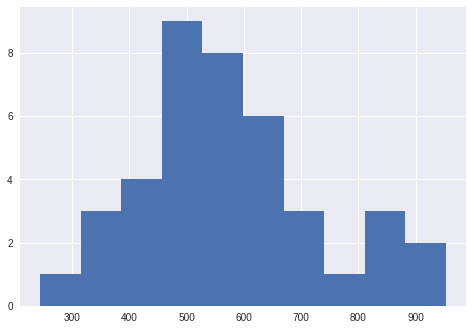

In [144]:
reactions = pd.Series(delays)
reactions.hist()

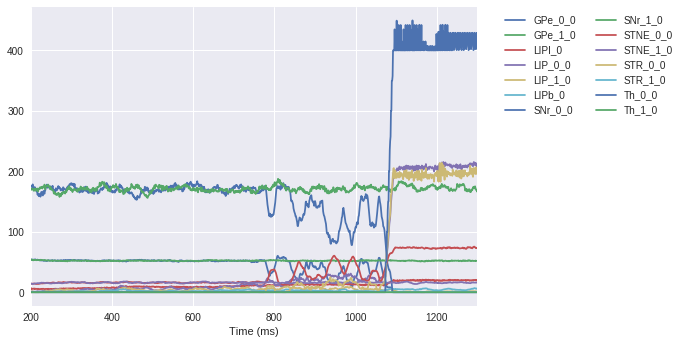

In [196]:
frames[0].plot(x='Time (ms)')
# _ = plt.legend(fontsize=13)
ax = plt.subplot(111)
ax.legend(loc='upper center', bbox_to_anchor=(1.25, 1),
          ncol=2, fancybox=True, shadow=True)

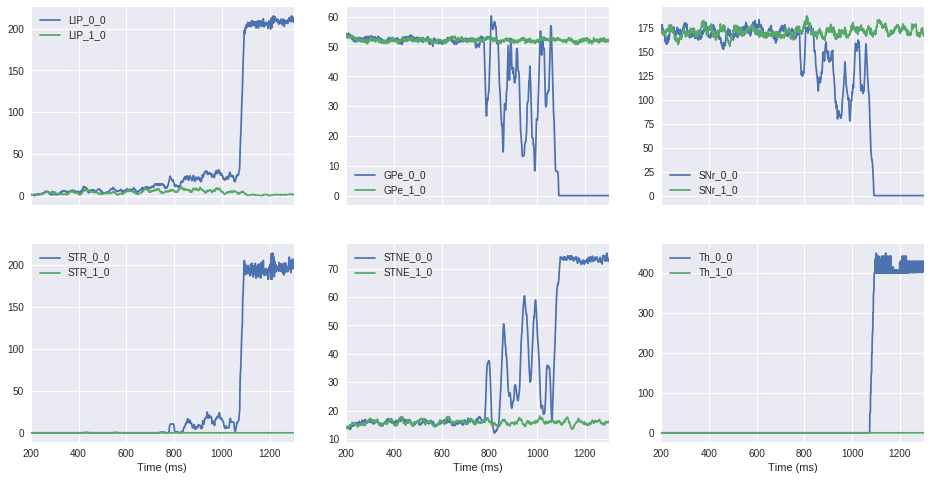

In [197]:
f, (ax1, ax2) = plt.subplots(2, 3, figsize=(16,8), sharex=True)
for i in range(0,2):
    frames[0].plot(x='Time (ms)', y='LIP_'+str(i)+'_0', ax=ax1[0])
    frames[0].plot(x='Time (ms)', y='GPe_'+str(i)+'_0', ax=ax1[1])
    frames[0].plot(x='Time (ms)', y='SNr_'+str(i)+'_0', ax=ax1[2])
    frames[0].plot(x='Time (ms)', y='STR_'+str(i)+'_0', ax=ax2[0])
    frames[0].plot(x='Time (ms)', y='STNE_'+str(i)+'_0', ax=ax2[1])
    frames[0].plot(x='Time (ms)', y='Th_'+str(i)+'_0', ax=ax2[2])

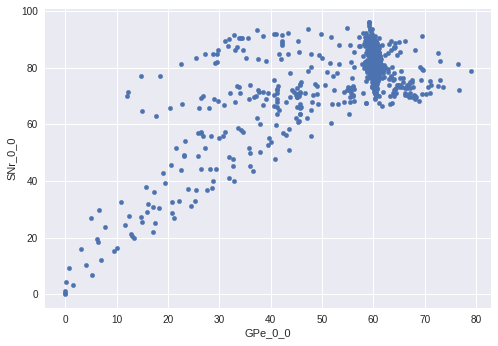

In [165]:
frames[0].plot(x='GPe_0_0', y='SNr_0_0', kind='scatter')